In [1]:


import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder #For assigning unique integer value to a catogeries
from sklearn.preprocessing import OneHotEncoder #For creating columns for all 
#the categories and assigning 1 or 0(notation for true/false) value to the column
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import (RandomOverSampler)
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#SMOTE Libraries
from imblearn.over_sampling import SMOTE
#ADASYN Libraries 
from imblearn.over_sampling import ADASYN
#Feature Engineering
import matplotlib.pyplot as plt
import seaborn as sns

#Imputation
from sklearn.tree import DecisionTreeRegressor

from pandas import Series

In [ ]:
import sys
!{sys.executable} -m pip install imblearn --user





In [ ]:
import sys
!{sys.executable} -m pip install SMOTE --user


In [ ]:
import sys
!{sys.executable} -m pip install -U scikit-learn --user





In [2]:
employee_data=pd.read_csv(r'C:\Users\Shivani Kolungade\Desktop\CHEMBL\GE\obfuscated_demo_data2.csv')
alert_data=pd.read_csv(r'C:\Users\Shivani Kolungade\Desktop\CHEMBL\GE\indicator_pairs_data updated.csv')

In [3]:
alert_data.isnull().sum()

alert_escalation_date      0
alert_id_fk                0
insert_date                0
score                      0
owner_name               258
employee_id                0
risk_factor                0
avg_score                  0
classification             0
hru                        0
alert_category             0
alert_type                 2
indicator_pairs            0
dtype: int64

In [4]:
alert_data.head()

,alert_escalation_date,alert_id_fk,insert_date,score,owner_name,employee_id,risk_factor,avg_score,classification,hru,alert_category,alert_type,indicator_pairs
0,1/17/2018,903129831,12/20/2017,10,Senior_Analyst_1,5160501257,-1.0,-1,TP/DE,HRU11,Atomic,Atomic,App_9_Atomic_DVD_Burn_IND
1,1/17/2018,184172653,12/20/2017,10,Senior_Analyst_1,5160501257,-1.0,-1,TP/DE,HRU11,Atomic,Atomic,App_9_Atomic_DVD_Burn_IND
2,1/17/2018,1144943035,12/20/2017,10,Senior_Analyst_1,5160501257,-1.0,-1,TP/DE,HRU11,Atomic,Atomic,App_9_Atomic_DVD_Burn_IND
3,1/17/2018,1478996666,12/20/2017,10,Senior_Analyst_1,5160501257,-1.0,-1,TP/DE,HRU11,Atomic,Atomic,App_9_Atomic_DVD_Burn_IND
4,1/17/2018,942102898,12/20/2017,10,Senior_Analyst_1,5160501257,-1.0,-1,TP/DE,HRU11,Atomic,Atomic,App_9_Atomic_DVD_Burn_IND


In [5]:
alert_data['alert_type'].value_counts()

Atomic          92589
Daily_Heat      16379
Weekly_Heat     11681
Monthly_Heat    11428
Name: alert_type, dtype: int64

In [6]:
daily_heat=alert_data.loc[alert_data['alert_type']=='Daily_Heat'].reset_index()

In [7]:
daily_heat.head()

,index,alert_escalation_date,alert_id_fk,insert_date,score,owner_name,employee_id,risk_factor,avg_score,classification,hru,alert_category,alert_type,indicator_pairs
0,7776,2/9/2018,976584706,1/24/2018,174,Senior_Analyst_1,19616361638,1.74,100,TP/DE,None,Heat,Daily_Heat,App_1_Heat_Box_PRE_2016_Q3
1,7793,2/9/2018,1764316194,1/24/2018,171,Senior_Analyst_1,19616361638,1.71,100,TP/DE,None,Heat,Daily_Heat,App_1_Heat_Box_PRE_2016_Q3
2,8092,2/9/2018,342985575,1/26/2018,321,Senior_Analyst_1,19616361638,3.21,100,TP/DE,None,Heat,Daily_Heat,App_1_Heat_Box_PRE_2016_Q3
3,8099,2/9/2018,1279998910,1/26/2018,312,Senior_Analyst_1,19616361638,3.12,100,TP/DE,None,Heat,Daily_Heat,App_1_Heat_Box_PRE_2016_Q3
4,8104,2/9/2018,1235439264,1/26/2018,300,Senior_Analyst_1,19616361638,3.00,100,TP/DE,None,Heat,Daily_Heat,App_1_Heat_Box_PRE_2016_Q3


In [8]:
daily_heat=daily_heat.drop(['index'],axis=1)

In [9]:
daily_heat.head()

,alert_escalation_date,alert_id_fk,insert_date,score,owner_name,employee_id,risk_factor,avg_score,classification,hru,alert_category,alert_type,indicator_pairs
0,2/9/2018,976584706,1/24/2018,174,Senior_Analyst_1,19616361638,1.74,100,TP/DE,None,Heat,Daily_Heat,App_1_Heat_Box_PRE_2016_Q3
1,2/9/2018,1764316194,1/24/2018,171,Senior_Analyst_1,19616361638,1.71,100,TP/DE,None,Heat,Daily_Heat,App_1_Heat_Box_PRE_2016_Q3
2,2/9/2018,342985575,1/26/2018,321,Senior_Analyst_1,19616361638,3.21,100,TP/DE,None,Heat,Daily_Heat,App_1_Heat_Box_PRE_2016_Q3
3,2/9/2018,1279998910,1/26/2018,312,Senior_Analyst_1,19616361638,3.12,100,TP/DE,None,Heat,Daily_Heat,App_1_Heat_Box_PRE_2016_Q3
4,2/9/2018,1235439264,1/26/2018,300,Senior_Analyst_1,19616361638,3.00,100,TP/DE,None,Heat,Daily_Heat,App_1_Heat_Box_PRE_2016_Q3


In [10]:
daily_heat['classification'].value_counts()

TP/DE      12224
FP          2566
TP/LOW      1114
TP/HIGH      475
Name: classification, dtype: int64

In [11]:
employee_data.shape

(3159, 11)

In [12]:
#Remove duplicate values from Employee Data
employee_data=employee_data.drop_duplicates(subset='employee_id')

In [13]:
employee_data.shape

(3157, 11)

In [14]:
#Tenure of employee -1(adding year column)
employee_data['year_of_hiring']=pd.DatetimeIndex(employee_data['ge_hire_date']).year

In [15]:
#Adding tenure column
employee_data['tenure']=(2020-employee_data['year_of_hiring'])

In [16]:
employee_data.isnull().sum()

employee_id              0
person_type              0
person_status            0
ge_hire_date           478
city                   142
state_name             174
country_name           174
function_group         174
job_function             0
career_band              0
industry_focus_name      0
year_of_hiring         478
tenure                 478
dtype: int64

In [17]:
employee_data['tenure'].describe()

count    2679.000000
mean       12.912654
std        10.324127
min         1.000000
25%         6.000000
50%        10.000000
75%        16.000000
max        62.000000
Name: tenure, dtype: float64

In [18]:
#Encoding
employee_data=pd.get_dummies(employee_data,columns=['job_function','career_band'])

In [19]:
employee_data.shape

(3157, 47)

In [20]:
employee_data=employee_data.iloc[:,np.r_[0,10:47]]

In [21]:
employee_data.head()

,employee_id,tenure,job_function_JOB_FUNCTION_1,job_function_JOB_FUNCTION_10,job_function_JOB_FUNCTION_11,job_function_JOB_FUNCTION_12,job_function_JOB_FUNCTION_13,job_function_JOB_FUNCTION_14,job_function_JOB_FUNCTION_15,job_function_JOB_FUNCTION_16,...,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8,career_band_CAREER_BAND_9
0,2163707601,23.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,9225331209,14.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9777696464,13.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,8893235549,17.0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1310142434,20.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [22]:
#Testing and Training
test_set=employee_data[employee_data['tenure'].isnull()]

In [23]:
test_set.shape

(478, 38)

In [24]:
train_set=employee_data[~employee_data['tenure'].isnull()]

In [25]:
train_set.shape

(2679, 38)

In [26]:
train_set.head()

,employee_id,tenure,job_function_JOB_FUNCTION_1,job_function_JOB_FUNCTION_10,job_function_JOB_FUNCTION_11,job_function_JOB_FUNCTION_12,job_function_JOB_FUNCTION_13,job_function_JOB_FUNCTION_14,job_function_JOB_FUNCTION_15,job_function_JOB_FUNCTION_16,...,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8,career_band_CAREER_BAND_9
0,2163707601,23.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,9225331209,14.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9777696464,13.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,8893235549,17.0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1310142434,20.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [27]:
#Imputation Methods are used to fill missing values
x=train_set.iloc[:,2:]

In [28]:
y=train_set.iloc[:,1]

In [29]:
regressor=DecisionTreeRegressor(random_state=0)

In [30]:
regressor.fit(x,y)

DecisionTreeRegressor(random_state=0)

In [31]:
test_set.head()
test_set_pred=test_set.iloc[:,2:]

In [32]:
tenure_predict=regressor.predict(test_set_pred)

In [33]:
tenure_predict

array([4.21621622, 4.21621622, 4.        , 4.        , 4.21621622,
       4.21621622, 4.21621622, 4.        , 4.21621622, 4.21621622,
       4.21621622, 4.        , 4.21621622, 4.        , 4.        ,
       2.        , 4.        , 4.        , 4.        , 4.        ,
       5.        , 4.        , 2.        , 2.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.21621622,
       4.        , 4.21621622, 4.21621622, 4.        , 4.        ,
       4.21621622, 4.        , 4.        , 4.        , 4.        ,
       4.21621622, 4.        , 4.21621622, 4.21621622, 4.        ,
       4.        , 4.21621622, 5.        , 4.21621622, 4.        ,
       4.        , 4.        , 4.        , 4.21621622, 4.        ,
       5.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.21621622, 4.        , 4.        ,
       4.        , 5.        , 4.        , 4.        , 4.     

In [34]:
test_set.head()

,employee_id,tenure,job_function_JOB_FUNCTION_1,job_function_JOB_FUNCTION_10,job_function_JOB_FUNCTION_11,job_function_JOB_FUNCTION_12,job_function_JOB_FUNCTION_13,job_function_JOB_FUNCTION_14,job_function_JOB_FUNCTION_15,job_function_JOB_FUNCTION_16,...,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8,career_band_CAREER_BAND_9
5,8714002494,NaN,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11,187153423,NaN,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12,4680091097,NaN,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
14,9678700500,NaN,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
91,19639355437,NaN,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [35]:
test_set=test_set.reset_index()

In [36]:
test_set.head()

,index,employee_id,tenure,job_function_JOB_FUNCTION_1,job_function_JOB_FUNCTION_10,job_function_JOB_FUNCTION_11,job_function_JOB_FUNCTION_12,job_function_JOB_FUNCTION_13,job_function_JOB_FUNCTION_14,job_function_JOB_FUNCTION_15,...,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8,career_band_CAREER_BAND_9
0,5,8714002494,NaN,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,11,187153423,NaN,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,12,4680091097,NaN,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,14,9678700500,NaN,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,91,19639355437,NaN,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [37]:
test_set=test_set.drop(['index'],axis=1)

In [38]:
test_set.head()

,employee_id,tenure,job_function_JOB_FUNCTION_1,job_function_JOB_FUNCTION_10,job_function_JOB_FUNCTION_11,job_function_JOB_FUNCTION_12,job_function_JOB_FUNCTION_13,job_function_JOB_FUNCTION_14,job_function_JOB_FUNCTION_15,job_function_JOB_FUNCTION_16,...,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8,career_band_CAREER_BAND_9
0,8714002494,NaN,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,187153423,NaN,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,4680091097,NaN,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,9678700500,NaN,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,19639355437,NaN,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [39]:
test_set['predicted_tenure']=pd.DataFrame({"predicted_tenure":tenure_predict})

In [40]:
test_set.head()

,employee_id,tenure,job_function_JOB_FUNCTION_1,job_function_JOB_FUNCTION_10,job_function_JOB_FUNCTION_11,job_function_JOB_FUNCTION_12,job_function_JOB_FUNCTION_13,job_function_JOB_FUNCTION_14,job_function_JOB_FUNCTION_15,job_function_JOB_FUNCTION_16,...,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8,career_band_CAREER_BAND_9,predicted_tenure
0,8714002494,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.216216
1,187153423,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.216216
2,4680091097,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.000000
3,9678700500,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.000000
4,19639355437,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.216216


In [41]:
test_set=test_set.drop(['tenure'],axis=1)

In [42]:
test_set.head()

,employee_id,job_function_JOB_FUNCTION_1,job_function_JOB_FUNCTION_10,job_function_JOB_FUNCTION_11,job_function_JOB_FUNCTION_12,job_function_JOB_FUNCTION_13,job_function_JOB_FUNCTION_14,job_function_JOB_FUNCTION_15,job_function_JOB_FUNCTION_16,job_function_JOB_FUNCTION_17,...,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8,career_band_CAREER_BAND_9,predicted_tenure
0,8714002494,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.216216
1,187153423,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.216216
2,4680091097,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.000000
3,9678700500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.000000
4,19639355437,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.216216


In [43]:
#Mapping empoyee to their tenure
employee_data.loc[employee_data.employee_id.isin(test_set.employee_id),'tenure']= employee_data.employee_id.map(test_set.set_index('employee_id').predicted_tenure)

In [44]:
employee_data.isnull().sum()

employee_id                     0
tenure                          0
job_function_JOB_FUNCTION_1     0
job_function_JOB_FUNCTION_10    0
job_function_JOB_FUNCTION_11    0
job_function_JOB_FUNCTION_12    0
job_function_JOB_FUNCTION_13    0
job_function_JOB_FUNCTION_14    0
job_function_JOB_FUNCTION_15    0
job_function_JOB_FUNCTION_16    0
job_function_JOB_FUNCTION_17    0
job_function_JOB_FUNCTION_18    0
job_function_JOB_FUNCTION_19    0
job_function_JOB_FUNCTION_2     0
job_function_JOB_FUNCTION_20    0
job_function_JOB_FUNCTION_21    0
job_function_JOB_FUNCTION_22    0
job_function_JOB_FUNCTION_23    0
job_function_JOB_FUNCTION_24    0
job_function_JOB_FUNCTION_25    0
job_function_JOB_FUNCTION_26    0
job_function_JOB_FUNCTION_3     0
job_function_JOB_FUNCTION_4     0
job_function_JOB_FUNCTION_5     0
job_function_JOB_FUNCTION_6     0
job_function_JOB_FUNCTION_7     0
job_function_JOB_FUNCTION_8     0
job_function_JOB_FUNCTION_9     0
career_band_CAREER_BAND_1       0
career_band_CA

In [45]:
employee_data.shape

(3157, 38)

In [46]:
#joining data: Joining the alert table and employee table
merge_data=daily_heat.merge(employee_data,
                           left_on='employee_id',
                           right_on='employee_id',
                           how='left')

In [47]:
merge_data.shape

(16379, 50)

In [48]:
merge_data.isnull().sum()

alert_escalation_date            0
alert_id_fk                      0
insert_date                      0
score                            0
owner_name                      79
employee_id                      0
risk_factor                      0
avg_score                        0
classification                   0
hru                              0
alert_category                   0
alert_type                       0
indicator_pairs                  0
tenure                           0
job_function_JOB_FUNCTION_1      0
job_function_JOB_FUNCTION_10     0
job_function_JOB_FUNCTION_11     0
job_function_JOB_FUNCTION_12     0
job_function_JOB_FUNCTION_13     0
job_function_JOB_FUNCTION_14     0
job_function_JOB_FUNCTION_15     0
job_function_JOB_FUNCTION_16     0
job_function_JOB_FUNCTION_17     0
job_function_JOB_FUNCTION_18     0
job_function_JOB_FUNCTION_19     0
job_function_JOB_FUNCTION_2      0
job_function_JOB_FUNCTION_20     0
job_function_JOB_FUNCTION_21     0
job_function_JOB_FUN

In [49]:
merge_data['classification'].value_counts()

TP/DE      12224
FP          2566
TP/LOW      1114
TP/HIGH      475
Name: classification, dtype: int64

In [50]:
merge_data['owner_name'].fillna("None", inplace=True)

In [51]:
merge_data.isnull().sum()

alert_escalation_date           0
alert_id_fk                     0
insert_date                     0
score                           0
owner_name                      0
employee_id                     0
risk_factor                     0
avg_score                       0
classification                  0
hru                             0
alert_category                  0
alert_type                      0
indicator_pairs                 0
tenure                          0
job_function_JOB_FUNCTION_1     0
job_function_JOB_FUNCTION_10    0
job_function_JOB_FUNCTION_11    0
job_function_JOB_FUNCTION_12    0
job_function_JOB_FUNCTION_13    0
job_function_JOB_FUNCTION_14    0
job_function_JOB_FUNCTION_15    0
job_function_JOB_FUNCTION_16    0
job_function_JOB_FUNCTION_17    0
job_function_JOB_FUNCTION_18    0
job_function_JOB_FUNCTION_19    0
job_function_JOB_FUNCTION_2     0
job_function_JOB_FUNCTION_20    0
job_function_JOB_FUNCTION_21    0
job_function_JOB_FUNCTION_22    0
job_function_J

In [52]:
merge_data

,alert_escalation_date,alert_id_fk,insert_date,score,owner_name,employee_id,risk_factor,avg_score,classification,hru,...,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8,career_band_CAREER_BAND_9
0,2/9/2018,976584706,1/24/2018,174,Senior_Analyst_1,19616361638,1.74,100,TP/DE,None,...,0,0,1,0,0,0,0,0,0,0
1,2/9/2018,1764316194,1/24/2018,171,Senior_Analyst_1,19616361638,1.71,100,TP/DE,None,...,0,0,1,0,0,0,0,0,0,0
2,2/9/2018,342985575,1/26/2018,321,Senior_Analyst_1,19616361638,3.21,100,TP/DE,None,...,0,0,1,0,0,0,0,0,0,0
3,2/9/2018,1279998910,1/26/2018,312,Senior_Analyst_1,19616361638,3.12,100,TP/DE,None,...,0,0,1,0,0,0,0,0,0,0
4,2/9/2018,1235439264,1/26/2018,300,Senior_Analyst_1,19616361638,3.00,100,TP/DE,None,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16374,9/24/2019,2039231178,9/24/2019,193,Analyst_6,19620542356,1.93,100,TP/DE,None,...,0,0,0,1,0,0,0,0,0,0
16375,9/24/2019,1159457803,9/24/2019,177,Analyst_7,11864624910,1.77,100,TP/DE,None,...,0,0,0,0,1,0,0,0,0,0
16376,9/24/2019,1076301311,9/24/2019,316,Analyst_7,665484379,3.16,100,TP/DE,None,...,0,0,0,0,0,0,0,1,0,0
16377,9/24/2019,1118121933,9/24/2019,216,Analyst_6,3669677450,2.16,100,TP/DE,None,...,0,0,0,0,0,0,1,0,0,0


In [53]:
#Spliting data from Indicator Pairs to create new records
split=merge_data['indicator_pairs'].str.split('/').apply(Series, 1).stack()

In [54]:
#Adjusting and dropping the index of the new stack created
split.index=split.index.droplevel(-1)

In [55]:
#Naming the series
split.name='indicators'

In [56]:
#Joining and making a new dataframe
new_merge_data=merge_data.join(split)

In [57]:
new_merge_data

,alert_escalation_date,alert_id_fk,insert_date,score,owner_name,employee_id,risk_factor,avg_score,classification,hru,...,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8,career_band_CAREER_BAND_9,indicators
0,2/9/2018,976584706,1/24/2018,174,Senior_Analyst_1,19616361638,1.74,100,TP/DE,None,...,0,1,0,0,0,0,0,0,0,App_1_Heat_Box_PRE_2016_Q3
1,2/9/2018,1764316194,1/24/2018,171,Senior_Analyst_1,19616361638,1.71,100,TP/DE,None,...,0,1,0,0,0,0,0,0,0,App_1_Heat_Box_PRE_2016_Q3
2,2/9/2018,342985575,1/26/2018,321,Senior_Analyst_1,19616361638,3.21,100,TP/DE,None,...,0,1,0,0,0,0,0,0,0,App_1_Heat_Box_PRE_2016_Q3
3,2/9/2018,1279998910,1/26/2018,312,Senior_Analyst_1,19616361638,3.12,100,TP/DE,None,...,0,1,0,0,0,0,0,0,0,App_1_Heat_Box_PRE_2016_Q3
4,2/9/2018,1235439264,1/26/2018,300,Senior_Analyst_1,19616361638,3.00,100,TP/DE,None,...,0,1,0,0,0,0,0,0,0,App_1_Heat_Box_PRE_2016_Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16377,9/24/2019,1118121933,9/24/2019,216,Analyst_6,3669677450,2.16,100,TP/DE,None,...,0,0,0,0,0,1,0,0,0,App_9_Heat_Email_IND
16377,9/24/2019,1118121933,9/24/2019,216,Analyst_6,3669677450,2.16,100,TP/DE,None,...,0,0,0,0,0,1,0,0,0,Threshold_Heat_Email_IND
16378,9/24/2019,1159467821,9/24/2019,198,Analyst_7,37607289000,1.98,100,TP/DE,None,...,0,0,0,0,0,1,0,0,0,App_3_Heat_Email_ZIP
16378,9/24/2019,1159467821,9/24/2019,198,Analyst_7,37607289000,1.98,100,TP/DE,None,...,0,0,0,0,0,1,0,0,0,App_9_Heat_Email_IND


In [58]:
#Dropping Duplicate values
duplicate_values=new_merge_data.duplicated(subset=None,keep='last')

In [59]:
duplicate_values.value_counts()

False    37519
True      3670
dtype: int64

In [60]:
new_merge_data.drop_duplicates(keep='last',inplace=True)

In [61]:
new_merge_data

,alert_escalation_date,alert_id_fk,insert_date,score,owner_name,employee_id,risk_factor,avg_score,classification,hru,...,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8,career_band_CAREER_BAND_9,indicators
0,2/9/2018,976584706,1/24/2018,174,Senior_Analyst_1,19616361638,1.74,100,TP/DE,None,...,0,1,0,0,0,0,0,0,0,App_1_Heat_Box_PRE_2016_Q3
1,2/9/2018,1764316194,1/24/2018,171,Senior_Analyst_1,19616361638,1.71,100,TP/DE,None,...,0,1,0,0,0,0,0,0,0,App_1_Heat_Box_PRE_2016_Q3
2,2/9/2018,342985575,1/26/2018,321,Senior_Analyst_1,19616361638,3.21,100,TP/DE,None,...,0,1,0,0,0,0,0,0,0,App_1_Heat_Box_PRE_2016_Q3
3,2/9/2018,1279998910,1/26/2018,312,Senior_Analyst_1,19616361638,3.12,100,TP/DE,None,...,0,1,0,0,0,0,0,0,0,App_1_Heat_Box_PRE_2016_Q3
4,2/9/2018,1235439264,1/26/2018,300,Senior_Analyst_1,19616361638,3.00,100,TP/DE,None,...,0,1,0,0,0,0,0,0,0,App_1_Heat_Box_PRE_2016_Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16377,9/24/2019,1118121933,9/24/2019,216,Analyst_6,3669677450,2.16,100,TP/DE,None,...,0,0,0,0,0,1,0,0,0,App_9_Heat_Email_IND
16377,9/24/2019,1118121933,9/24/2019,216,Analyst_6,3669677450,2.16,100,TP/DE,None,...,0,0,0,0,0,1,0,0,0,Threshold_Heat_Email_IND
16378,9/24/2019,1159467821,9/24/2019,198,Analyst_7,37607289000,1.98,100,TP/DE,None,...,0,0,0,0,0,1,0,0,0,App_3_Heat_Email_ZIP
16378,9/24/2019,1159467821,9/24/2019,198,Analyst_7,37607289000,1.98,100,TP/DE,None,...,0,0,0,0,0,1,0,0,0,App_9_Heat_Email_IND


In [62]:
new_merge_data.shape

(37519, 51)

In [63]:
new_merge_data.columns

Index(['alert_escalation_date', 'alert_id_fk', 'insert_date', 'score',
       'owner_name', 'employee_id', 'risk_factor', 'avg_score',
       'classification', 'hru', 'alert_category', 'alert_type',
       'indicator_pairs', 'tenure', 'job_function_JOB_FUNCTION_1',
       'job_function_JOB_FUNCTION_10', 'job_function_JOB_FUNCTION_11',
       'job_function_JOB_FUNCTION_12', 'job_function_JOB_FUNCTION_13',
       'job_function_JOB_FUNCTION_14', 'job_function_JOB_FUNCTION_15',
       'job_function_JOB_FUNCTION_16', 'job_function_JOB_FUNCTION_17',
       'job_function_JOB_FUNCTION_18', 'job_function_JOB_FUNCTION_19',
       'job_function_JOB_FUNCTION_2', 'job_function_JOB_FUNCTION_20',
       'job_function_JOB_FUNCTION_21', 'job_function_JOB_FUNCTION_22',
       'job_function_JOB_FUNCTION_23', 'job_function_JOB_FUNCTION_24',
       'job_function_JOB_FUNCTION_25', 'job_function_JOB_FUNCTION_26',
       'job_function_JOB_FUNCTION_3', 'job_function_JOB_FUNCTION_4',
       'job_function_JOB_FU

In [64]:
#Deleting unwanted columns
data=new_merge_data.drop(['alert_escalation_date','alert_id_fk', 'insert_date','alert_category', 
                          'alert_type','avg_score','employee_id','indicator_pairs'], axis=1)


In [65]:
data.head()

,score,owner_name,risk_factor,classification,hru,tenure,job_function_JOB_FUNCTION_1,job_function_JOB_FUNCTION_10,job_function_JOB_FUNCTION_11,job_function_JOB_FUNCTION_12,...,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8,career_band_CAREER_BAND_9,indicators
0,174,Senior_Analyst_1,1.74,TP/DE,None,22.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,App_1_Heat_Box_PRE_2016_Q3
1,171,Senior_Analyst_1,1.71,TP/DE,None,22.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,App_1_Heat_Box_PRE_2016_Q3
2,321,Senior_Analyst_1,3.21,TP/DE,None,22.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,App_1_Heat_Box_PRE_2016_Q3
3,312,Senior_Analyst_1,3.12,TP/DE,None,22.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,App_1_Heat_Box_PRE_2016_Q3
4,300,Senior_Analyst_1,3.00,TP/DE,None,22.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,App_1_Heat_Box_PRE_2016_Q3


In [66]:
encoder=pd.get_dummies(data, columns=['owner_name','classification','hru','indicators'])

In [67]:
encoder.shape


(37519, 149)

In [68]:
encoder.head()

,score,risk_factor,tenure,job_function_JOB_FUNCTION_1,job_function_JOB_FUNCTION_10,job_function_JOB_FUNCTION_11,job_function_JOB_FUNCTION_12,job_function_JOB_FUNCTION_13,job_function_JOB_FUNCTION_14,job_function_JOB_FUNCTION_15,...,indicators_Keywords_Heat_Service_NON_MIL,indicators_Threshold_Heat_BA_IND,indicators_Threshold_Heat_Email_IND,indicators_Threshold_Heat_NTD_EXE_IND,indicators_Threshold_Heat_NTD_IND,indicators_Threshold_Heat_Print_IND,indicators_Threshold_Heat_USB_IND,indicators_Top_Users_Heat_CD_Burn_IND,indicators_Top_Users_Heat_Egress_IND,indicators_Top_Users_Heat_USB_IND
0,174,1.74,22.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,171,1.71,22.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,321,3.21,22.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,312,3.12,22.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,300,3.00,22.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
from sklearn.cluster import KMeans

In [70]:
distortions=[]
K=range(1,11)
for k in K:
    kmeanModel=KMeans(n_clusters=k)
    #fitting dataframe into the model
    kmeanModel.fit(encoder)
    distortions.append(kmeanModel.inertia_)


Text(0.5, 1.0, 'Vizualizing optimal K via Elbow Method')

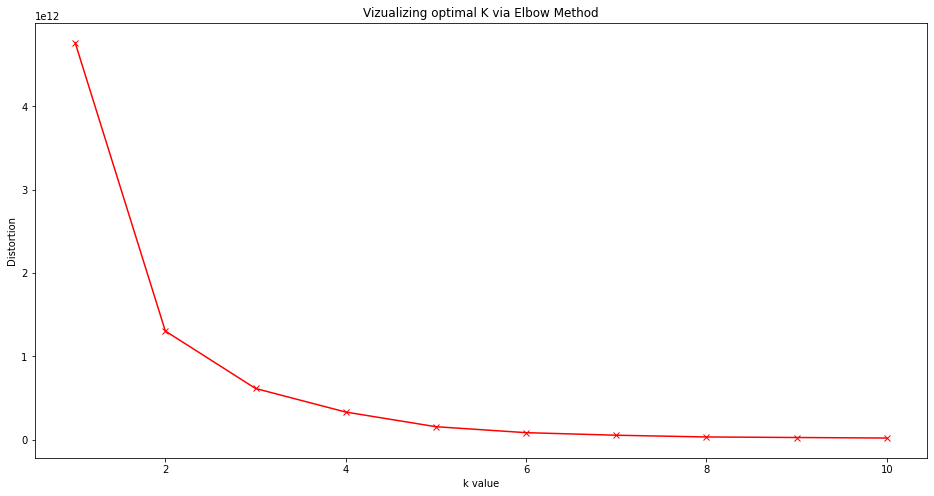

In [71]:
plt.figure(figsize=(16,8))
plt.plot(K,distortions,'bx-',color='red')
plt.xlabel('k value')
plt.ylabel('Distortion')
plt.title('Vizualizing optimal K via Elbow Method')

In [72]:
from sklearn.metrics import silhouette_score
range_n_clusters = list(range(3,10))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(encoder)
    centers = clusterer.cluster_centers_
    
    score = silhouette_score(encoder, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters,score))

For n_clusters = 3, silhouette score is 0.9632159089284595)
For n_clusters = 4, silhouette score is 0.9330654719521444)
For n_clusters = 5, silhouette score is 0.9332714452421723)
For n_clusters = 6, silhouette score is 0.930867706414266)
For n_clusters = 7, silhouette score is 0.8921036391658181)
For n_clusters = 8, silhouette score is 0.8691215031619112)
For n_clusters = 9, silhouette score is 0.8690138547649797)


In [73]:
kmeans=KMeans(n_clusters=3,random_state=0)

In [74]:
clusters=kmeans.fit_predict(encoder)

In [75]:
print(clusters)

[0 0 0 ... 0 0 0]


In [76]:
encoder

,score,risk_factor,tenure,job_function_JOB_FUNCTION_1,job_function_JOB_FUNCTION_10,job_function_JOB_FUNCTION_11,job_function_JOB_FUNCTION_12,job_function_JOB_FUNCTION_13,job_function_JOB_FUNCTION_14,job_function_JOB_FUNCTION_15,...,indicators_Keywords_Heat_Service_NON_MIL,indicators_Threshold_Heat_BA_IND,indicators_Threshold_Heat_Email_IND,indicators_Threshold_Heat_NTD_EXE_IND,indicators_Threshold_Heat_NTD_IND,indicators_Threshold_Heat_Print_IND,indicators_Threshold_Heat_USB_IND,indicators_Top_Users_Heat_CD_Burn_IND,indicators_Top_Users_Heat_Egress_IND,indicators_Top_Users_Heat_USB_IND
0,174,1.74,22.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,171,1.71,22.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,321,3.21,22.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,312,3.12,22.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,300,3.00,22.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16377,216,2.16,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16377,216,2.16,4.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
16378,198,1.98,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16378,198,1.98,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
encoder=encoder.reset_index()
df=pd.DataFrame(clusters)
df.columns=['cluster_pred']
newdata=pd.concat([encoder,df], axis = 1).reset_index()

In [78]:
newdata

,level_0,index,score,risk_factor,tenure,job_function_JOB_FUNCTION_1,job_function_JOB_FUNCTION_10,job_function_JOB_FUNCTION_11,job_function_JOB_FUNCTION_12,job_function_JOB_FUNCTION_13,...,indicators_Threshold_Heat_BA_IND,indicators_Threshold_Heat_Email_IND,indicators_Threshold_Heat_NTD_EXE_IND,indicators_Threshold_Heat_NTD_IND,indicators_Threshold_Heat_Print_IND,indicators_Threshold_Heat_USB_IND,indicators_Top_Users_Heat_CD_Burn_IND,indicators_Top_Users_Heat_Egress_IND,indicators_Top_Users_Heat_USB_IND,cluster_pred
0,0,0,174,1.74,22.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,171,1.71,22.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,321,3.21,22.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,312,3.12,22.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,300,3.00,22.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37514,37514,16377,216,2.16,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37515,37515,16377,216,2.16,4.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
37516,37516,16378,198,1.98,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37517,37517,16378,198,1.98,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
#newdata.drop(['level_0'],['index']), axis=1

newdata=newdata.drop(['level_0','index'], axis=1)


In [80]:
newdata

,score,risk_factor,tenure,job_function_JOB_FUNCTION_1,job_function_JOB_FUNCTION_10,job_function_JOB_FUNCTION_11,job_function_JOB_FUNCTION_12,job_function_JOB_FUNCTION_13,job_function_JOB_FUNCTION_14,job_function_JOB_FUNCTION_15,...,indicators_Threshold_Heat_BA_IND,indicators_Threshold_Heat_Email_IND,indicators_Threshold_Heat_NTD_EXE_IND,indicators_Threshold_Heat_NTD_IND,indicators_Threshold_Heat_Print_IND,indicators_Threshold_Heat_USB_IND,indicators_Top_Users_Heat_CD_Burn_IND,indicators_Top_Users_Heat_Egress_IND,indicators_Top_Users_Heat_USB_IND,cluster_pred
0,174,1.74,22.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,171,1.71,22.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,321,3.21,22.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,312,3.12,22.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,300,3.00,22.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37514,216,2.16,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37515,216,2.16,4.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
37516,198,1.98,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37517,198,1.98,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
gb=newdata.groupby(['cluster_pred']).sum()

In [82]:
gb

,score,risk_factor,tenure,job_function_JOB_FUNCTION_1,job_function_JOB_FUNCTION_10,job_function_JOB_FUNCTION_11,job_function_JOB_FUNCTION_12,job_function_JOB_FUNCTION_13,job_function_JOB_FUNCTION_14,job_function_JOB_FUNCTION_15,...,indicators_Keywords_Heat_Service_NON_MIL,indicators_Threshold_Heat_BA_IND,indicators_Threshold_Heat_Email_IND,indicators_Threshold_Heat_NTD_EXE_IND,indicators_Threshold_Heat_NTD_IND,indicators_Threshold_Heat_Print_IND,indicators_Threshold_Heat_USB_IND,indicators_Top_Users_Heat_CD_Burn_IND,indicators_Top_Users_Heat_Egress_IND,indicators_Top_Users_Heat_USB_IND
cluster_pred,,,,,,,,,,,,,,,,,,,,,
0,43030743,170283.655864,382867.027027,25.0,1225.0,221.0,25.0,1891.0,79.0,5355.0,...,11.0,2027.0,7313.0,24.0,20.0,900.0,351.0,217.0,577.0,1850.0
1,9885610,512.145412,700.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0
2,13121330,3761.514971,4059.000000,0.0,0.0,0.0,0.0,50.0,0.0,0.0,...,0.0,16.0,5.0,0.0,0.0,0.0,0.0,19.0,0.0,44.0


In [83]:
gb[['classification_TP/HIGH', 'classification_TP/LOW', 'classification_TP/DE', 'classification_FP']]


,classification_TP/HIGH,classification_TP/LOW,classification_TP/DE,classification_FP
cluster_pred,,,,
0,1364.0,3211.0,28892.0,3786.0
1,0.0,0.0,28.0,0.0
2,8.0,69.0,157.0,4.0


In [84]:
gb.to_csv(r'C:\Users\Shivani Kolungade\Desktop\CHEMBL\GE\Update.csv')

#RandomForest

In [85]:
#Random Forest
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
#from sklearn.externals import joblib
print('Libraries Imported')




Libraries Imported


In [86]:
#get origibal data and try model son it


encoder=encoder.drop(['index'], axis=1)
encoder

,score,risk_factor,tenure,job_function_JOB_FUNCTION_1,job_function_JOB_FUNCTION_10,job_function_JOB_FUNCTION_11,job_function_JOB_FUNCTION_12,job_function_JOB_FUNCTION_13,job_function_JOB_FUNCTION_14,job_function_JOB_FUNCTION_15,...,indicators_Keywords_Heat_Service_NON_MIL,indicators_Threshold_Heat_BA_IND,indicators_Threshold_Heat_Email_IND,indicators_Threshold_Heat_NTD_EXE_IND,indicators_Threshold_Heat_NTD_IND,indicators_Threshold_Heat_Print_IND,indicators_Threshold_Heat_USB_IND,indicators_Top_Users_Heat_CD_Burn_IND,indicators_Top_Users_Heat_Egress_IND,indicators_Top_Users_Heat_USB_IND
0,174,1.74,22.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,171,1.71,22.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,321,3.21,22.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,312,3.12,22.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,300,3.00,22.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37514,216,2.16,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37515,216,2.16,4.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
37516,198,1.98,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37517,198,1.98,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
encoder['classification_TP/HIGH']
#encoder.columns

0        0
1        0
2        0
3        0
4        0
        ..
37514    0
37515    0
37516    0
37517    0
37518    0
Name: classification_TP/HIGH, Length: 37519, dtype: uint8

In [88]:
data

,score,owner_name,risk_factor,classification,hru,tenure,job_function_JOB_FUNCTION_1,job_function_JOB_FUNCTION_10,job_function_JOB_FUNCTION_11,job_function_JOB_FUNCTION_12,...,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8,career_band_CAREER_BAND_9,indicators
0,174,Senior_Analyst_1,1.74,TP/DE,None,22.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,App_1_Heat_Box_PRE_2016_Q3
1,171,Senior_Analyst_1,1.71,TP/DE,None,22.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,App_1_Heat_Box_PRE_2016_Q3
2,321,Senior_Analyst_1,3.21,TP/DE,None,22.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,App_1_Heat_Box_PRE_2016_Q3
3,312,Senior_Analyst_1,3.12,TP/DE,None,22.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,App_1_Heat_Box_PRE_2016_Q3
4,300,Senior_Analyst_1,3.00,TP/DE,None,22.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,App_1_Heat_Box_PRE_2016_Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16377,216,Analyst_6,2.16,TP/DE,None,4.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,App_9_Heat_Email_IND
16377,216,Analyst_6,2.16,TP/DE,None,4.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Threshold_Heat_Email_IND
16378,198,Analyst_7,1.98,TP/DE,None,4.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,App_3_Heat_Email_ZIP
16378,198,Analyst_7,1.98,TP/DE,None,4.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,App_9_Heat_Email_IND


In [89]:
data_classify=pd.get_dummies(data, columns=['owner_name','hru','indicators'])

In [90]:
data_classify

,score,risk_factor,classification,tenure,job_function_JOB_FUNCTION_1,job_function_JOB_FUNCTION_10,job_function_JOB_FUNCTION_11,job_function_JOB_FUNCTION_12,job_function_JOB_FUNCTION_13,job_function_JOB_FUNCTION_14,...,indicators_Keywords_Heat_Service_NON_MIL,indicators_Threshold_Heat_BA_IND,indicators_Threshold_Heat_Email_IND,indicators_Threshold_Heat_NTD_EXE_IND,indicators_Threshold_Heat_NTD_IND,indicators_Threshold_Heat_Print_IND,indicators_Threshold_Heat_USB_IND,indicators_Top_Users_Heat_CD_Burn_IND,indicators_Top_Users_Heat_Egress_IND,indicators_Top_Users_Heat_USB_IND
0,174,1.74,TP/DE,22.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,171,1.71,TP/DE,22.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,321,3.21,TP/DE,22.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,312,3.12,TP/DE,22.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,300,3.00,TP/DE,22.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16377,216,2.16,TP/DE,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16377,216,2.16,TP/DE,4.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
16378,198,1.98,TP/DE,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16378,198,1.98,TP/DE,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
data_classify['classification'].replace({"FP" : "0",
                                        "TP/DE" : "1",
                                        "TP/LOW" : "2",
                                        "TP/HIGH" : "3"}, inplace=True)

In [92]:
data_classify

,score,risk_factor,classification,tenure,job_function_JOB_FUNCTION_1,job_function_JOB_FUNCTION_10,job_function_JOB_FUNCTION_11,job_function_JOB_FUNCTION_12,job_function_JOB_FUNCTION_13,job_function_JOB_FUNCTION_14,...,indicators_Keywords_Heat_Service_NON_MIL,indicators_Threshold_Heat_BA_IND,indicators_Threshold_Heat_Email_IND,indicators_Threshold_Heat_NTD_EXE_IND,indicators_Threshold_Heat_NTD_IND,indicators_Threshold_Heat_Print_IND,indicators_Threshold_Heat_USB_IND,indicators_Top_Users_Heat_CD_Burn_IND,indicators_Top_Users_Heat_Egress_IND,indicators_Top_Users_Heat_USB_IND
0,174,1.74,1,22.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,171,1.71,1,22.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,321,3.21,1,22.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,312,3.12,1,22.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,300,3.00,1,22.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16377,216,2.16,1,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16377,216,2.16,1,4.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
16378,198,1.98,1,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16378,198,1.98,1,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
# we do this because the target variable, 
#should take it as different categories from
#the logical memory
#factorire the data
factor=pd.factorize(data_classify['classification'])
data_classify.classification = factor[0]
definitions = factor[1]
print(data_classify.classification.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: classification, dtype: int64
Index(['1', '2', '3', '0'], dtype='object')


In [94]:
#convert the high to 1 and rest to 0
tpHighDf=data_classify.copy()

In [95]:
tpHighDf['classification'].unique()

array([0, 1, 2, 3], dtype=int64)

In [96]:
tpHighDf['classification'] = (tpHighDf['classification'] == 3).astype(int)

In [97]:
tpHighDf['classification'].value_counts()

0    33729
1     3790
Name: classification, dtype: int64

In [98]:
tpHighDf.shape

(37519, 146)

In [99]:
tpHighDf.head(5)

,score,risk_factor,classification,tenure,job_function_JOB_FUNCTION_1,job_function_JOB_FUNCTION_10,job_function_JOB_FUNCTION_11,job_function_JOB_FUNCTION_12,job_function_JOB_FUNCTION_13,job_function_JOB_FUNCTION_14,...,indicators_Keywords_Heat_Service_NON_MIL,indicators_Threshold_Heat_BA_IND,indicators_Threshold_Heat_Email_IND,indicators_Threshold_Heat_NTD_EXE_IND,indicators_Threshold_Heat_NTD_IND,indicators_Threshold_Heat_Print_IND,indicators_Threshold_Heat_USB_IND,indicators_Top_Users_Heat_CD_Burn_IND,indicators_Top_Users_Heat_Egress_IND,indicators_Top_Users_Heat_USB_IND
0,174,1.74,0,22.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,171,1.71,0,22.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,321,3.21,0,22.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,312,3.12,0,22.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,300,3.00,0,22.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
from sklearn import metrics

In [103]:
X=tpHighDf.iloc[:, np.r_[0,1,3:146]]
Y=tpHighDf.iloc[:,2]

In [104]:
x_train, x_test_val,y_train, y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [105]:
import sys
!{sys.executable} -m pip update scikit-learn --user

'C:\Users\Shivani' is not recognized as an internal or external command,
operable program or batch file.


In [132]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test_val)


In [133]:
asyn=ADASYN(sampling_strategy='minority',random_state=420,n_neighbors=10)

x_rs,y_rs=asyn.fit_sample(X_train,y_train)


In [134]:
y_rd_df=pd.DataFrame(y_rs)

In [135]:
y_rd_df['classification'].value_counts()

0    23593
1    23544
Name: classification, dtype: int64

In [136]:
decision_tree=DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [137]:
decision_tree.fit(x_rs,y_rs)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [138]:
y_pred=decision_tree.predict(X_test)

In [139]:
print(pd.crosstab(y_test,y_pred,rownames=['Actual Observations'],
                  colnames=['Predicted Observations']))
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))


Predicted Observations     0     1
Actual Observations               
0                       9440   696
1                         25  1095
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     10136
           1       0.61      0.98      0.75      1120

    accuracy                           0.94     11256
   macro avg       0.80      0.95      0.86     11256
weighted avg       0.96      0.94      0.94     11256

Accuracy: 0.9359452736318408


In [140]:
#RandomForest
random=RandomForestClassifier(criterion='entropy',n_estimators=20,random_state=45)
random.fit(x_rs,y_rs)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=45)

In [141]:
y_pred=random.predict(X_test)

In [142]:
print(pd.crosstab(y_test,y_pred,rownames=['Actual Observations'],
                  colnames=['Predicted Observations']))
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))


Predicted Observations     0     1
Actual Observations               
0                       9940   196
1                         71  1049
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     10136
           1       0.84      0.94      0.89      1120

    accuracy                           0.98     11256
   macro avg       0.92      0.96      0.94     11256
weighted avg       0.98      0.98      0.98     11256

Accuracy: 0.9762793176972282


In [143]:
boost=GradientBoostingClassifier()

In [144]:
boost.fit(x_rs,y_rs)

GradientBoostingClassifier()

In [145]:
y_pred=boost.predict(X_test)

In [146]:
print(pd.crosstab(y_test,y_pred,rownames=['Actual Observations'],
                  colnames=['Predicted Observations']))
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))


Predicted Observations     0     1
Actual Observations               
0                       9344   792
1                         39  1081
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     10136
           1       0.58      0.97      0.72      1120

    accuracy                           0.93     11256
   macro avg       0.79      0.94      0.84     11256
weighted avg       0.95      0.93      0.93     11256

Accuracy: 0.9261727078891258


In [128]:
#Random forest works best with acciracy of 97% 

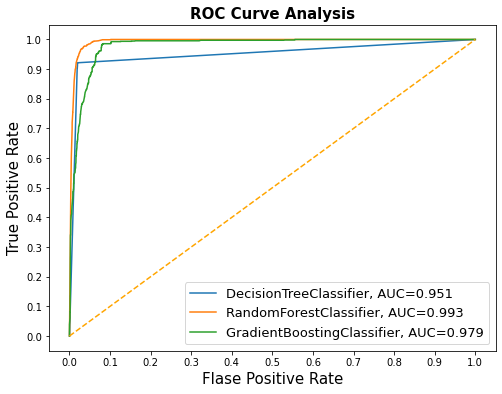

In [148]:
# Import the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234),
              GradientBoostingClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(x_rs, y_rs)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()
